# 1. Load the Preprocessed Data

In [1]:
import os
import sys

# Indicate if the script is running on Google Colab or not
using_colab = 'google.colab' in sys.modules

if using_colab:
    # Connect Google Drive to Colab
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    
    # Install necessary packages
    !pip install numpy pandas scikit-learn matplotlib seaborn imbalanced-learn shap
    
    # Path for Google Colab
    project_root = '/content/gdrive/MyDrive/oc_projet_4/' 
else:
    # Get the current working directory as base directory for the notebook
    base_dir = os.getcwd()
    
    # Adjust the project root path relatively to where the notebook is located
    # Assuming the notebook is inside a 'notebooks' directory and we need to go up one level to access project root
    project_root = os.path.join(base_dir, '..')

# Clean output of cell
from IPython.display import clear_output
clear_output()

In [2]:
import pandas as pd

# Load the CSV file
train_domain_path = os.path.join(project_root, 'data', 'app_train_domain.csv')

app_train_domain = pd.read_csv(train_domain_path)  # Load the training data

# Extract the features and target variable
X = app_train_domain.drop(columns=['TARGET']).values  # Features for training
y = app_train_domain['TARGET'].values  # Target variable for training

print('Data loaded successfully.')
print(f'X shape: {X.shape}')  # X is used for training the model
print(f'y shape: {y.shape}')  # y is the target variable for training

Data loaded successfully.
X shape: (307511, 247)
y shape: (307511,)


In [2]:
import os
import pandas as pd
from scipy.stats import shapiro, zscore
import warnings

using_colab = 'google.colab' in sys.modules

if using_colab:
    # Load the CSV file using the relative path
    train_domain_path = os.path.join(project_root, 'data', 'app_train_domain.csv')
else:
    # Get the current working directory as base directory for the notebook
    base_dir = os.getcwd()
    
    # Adjust the project root path relatively to where the notebook is located
    # Assuming the notebook is inside a 'notebooks' directory and we need to go up one level to access project root
    project_root = os.path.join(base_dir, '..')

# Load the CSV file using relative path
train_domain_path = os.path.join(project_root, 'data', 'app_train_domain.csv')

train_data = pd.read_csv(train_domain_path)  # Load the training data

# Features to analyze
features_to_analyze = [
    'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
    'DAYS_EMPLOYED_PERCENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'
]

# Shapiro-Wilk Test for normality
def test_normality(df, features):
    normality_results = {}
    warnings_list = []
    for feature in features:
        data = df[feature].dropna()
        if len(data) > 5000:
            warnings_list.append(f"N = {len(data)} for feature {feature}")
        stat, p = shapiro(data)  # Ignore missing values for the test
        normality_results[feature] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    
    if warnings_list:
        warnings.warn(f"For N > 5000, computed p-value may not be accurate. {', '.join(warnings_list)}")
    
    return normality_results

# Detecting outliers using z-score
def detect_outliers(df, features):
    outliers_results = {}
    for feature in features:
        z_scores = zscore(df[feature].dropna())  # Ignore missing values for z-score calculation
        outliers = np.where(np.abs(z_scores) > 3)[0]  # Outliers with z-score > 3
        outliers_results[feature] = df[feature].iloc[outliers]
    return outliers_results

# Execute the functions
normality_results = test_normality(train_data, features_to_analyze)
outliers_results = detect_outliers(train_data, features_to_analyze)

# Display the results
print("Normality Test Results (Shapiro-Wilk):")
for feature, result in normality_results.items():
    print(f"{feature}: Statistic={result['Statistic']}, p-value={result['p-value']}, Normal={result['Normal']}")

print("\nDetected Outliers:")
for feature, outliers in outliers_results.items():
    print(f"{feature}: {len(outliers)} outliers")
    print(outliers)


C:\Users\pat\AppData\Local\Temp\ipykernel_15988\2760031153.py:39: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307511.
  stat, p = shapiro(data)  # Ignore missing values for the test


Normality Test Results (Shapiro-Wilk):
CREDIT_INCOME_PERCENT: Statistic=0.8683387382469063, p-value=7.017665490743911e-144, Normal=False
ANNUITY_INCOME_PERCENT: Statistic=0.9120356975923316, p-value=1.7391184523648002e-131, Normal=False
CREDIT_TERM: Statistic=0.8813492261004188, p-value=1.2529197766384718e-140, Normal=False
DAYS_EMPLOYED_PERCENT: Statistic=0.8455920689876675, p-value=6.2034854179349085e-149, Normal=False
EXT_SOURCE_1: Statistic=0.8413734001601811, p-value=8.494600632668699e-150, Normal=False
EXT_SOURCE_2: Statistic=0.9267468129817444, p-value=4.763031590479468e-126, Normal=False
EXT_SOURCE_3: Statistic=0.9644152629779538, p-value=9.85564431307928e-106, Normal=False
DAYS_BIRTH: Statistic=0.9696564518865638, p-value=1.709357664268864e-101, Normal=False

Detected Outliers:
CREDIT_INCOME_PERCENT: 4340 outliers
176       12.835714
270       13.754462
371       13.611000
380       12.112000
678       34.916667
            ...    
307369    13.742400
307401    12.729433
30744

C:\Users\pat\AppData\Local\Temp\ipykernel_15988\2760031153.py:43: UserWarning: For N > 5000, computed p-value may not be accurate. N = 307511 for feature CREDIT_INCOME_PERCENT, N = 307511 for feature ANNUITY_INCOME_PERCENT, N = 307511 for feature CREDIT_TERM, N = 307511 for feature DAYS_EMPLOYED_PERCENT, N = 307511 for feature EXT_SOURCE_1, N = 307511 for feature EXT_SOURCE_2, N = 307511 for feature EXT_SOURCE_3, N = 307511 for feature DAYS_BIRTH
  warnings.warn(f"For N > 5000, computed p-value may not be accurate. {', '.join(warnings_list)}")


### Analysis and Interpretation

#### Normality Test Results (Shapiro-Wilk)

The Shapiro-Wilk test was applied to each feature to assess normality. Here are the results:

- **CREDIT_INCOME_PERCENT**: Statistic=0.868, p-value=7.018e-144, Normal=False
- **ANNUITY_INCOME_PERCENT**: Statistic=0.912, p-value=1.739e-131, Normal=False
- **CREDIT_TERM**: Statistic=0.881, p-value=1.253e-140, Normal=False
- **DAYS_EMPLOYED_PERCENT**: Statistic=0.846, p-value=6.203e-149, Normal=False
- **EXT_SOURCE_1**: Statistic=0.841, p-value=8.495e-150, Normal=False
- **EXT_SOURCE_2**: Statistic=0.927, p-value=4.763e-126, Normal=False
- **EXT_SOURCE_3**: Statistic=0.964, p-value=9.856e-106, Normal=False
- **DAYS_BIRTH**: Statistic=0.970, p-value=1.709e-101, Normal=False

**Interpretation**:
- All the p-values are significantly smaller than 0.05, which means that none of the features follow a normal distribution. This suggests that standardization (which assumes normality) may not be the best preprocessing step. Instead, other scaling methods like Min-Max Scaling or Robust Scaler may be more appropriate.

#### Detected Outliers

The z-score method was used to detect outliers in each feature. Here are the results:

- **CREDIT_INCOME_PERCENT**: 4340 outliers
- **ANNUITY_INCOME_PERCENT**: 3792 outliers
- **CREDIT_TERM**: 106 outliers
- **DAYS_EMPLOYED_PERCENT**: 6975 outliers
- **EXT_SOURCE_1**: 1593 outliers
- **EXT_SOURCE_2**: 0 outliers
- **EXT_SOURCE_3**: 0 outliers
- **DAYS_BIRTH**: 0 outliers

**Interpretation**:
- **CREDIT_INCOME_PERCENT**, **ANNUITY_INCOME_PERCENT**, **DAYS_EMPLOYED_PERCENT**, and **EXT_SOURCE_1** have a significant number of outliers. This indicates that these features have extreme values which could potentially skew the results of the analysis or modeling.
- **EXT_SOURCE_2**, **EXT_SOURCE_3**, and **DAYS_BIRTH** do not have any outliers detected with the z-score method, suggesting these features are more stable and less prone to extreme values.

### Recommendations

Given these findings, here are some recommendations for preprocessing and modeling:

1. **Normalization/Scaling**:
   - Since the features do not follow a normal distribution, consider using **Min-Max Scaling** or **Robust Scaler** instead of standardization. Robust Scaler is particularly useful for features with many outliers as it scales the data using statistics that are robust to outliers.

2. **Handling Outliers**:
   - For features with significant outliers, consider applying techniques such as:
     - **Winsorizing**: Capping the extreme values.
     - **Transformation**: Applying log, square root, or other transformations to reduce the effect of outliers.
     - **Removal**: Removing data points that are identified as outliers, although this should be done cautiously to avoid losing valuable information.

3. **Feature Engineering**:
   - Investigate if some of these outliers are due to data entry errors or other anomalies that can be corrected.
   - For features with many outliers, you can create additional features that capture the presence of outliers, e.g., a binary feature indicating if a value is an outlier or not.

4. **Modeling**:
   - Use models that are less sensitive to outliers, such as tree-based methods (e.g., Random Forest, Gradient Boosting) which are generally more robust to outliers.
   - Ensure that you have robust cross-validation practices to evaluate the impact of these preprocessing steps.

### Next Steps

- Implement Min-Max Scaling or Robust Scaling on the features.
- Apply outlier handling techniques as needed.
- Re-evaluate the performance of your model with these preprocessing steps.
- Ensure that your evaluation metrics align with the business goals, such as minimizing the cost of prediction errors as outlined in your project requirements.

By following these recommendations, you can ensure that your data preprocessing is robust and your models are well-prepared to handle the characteristics of your dataset.

# 2. Create a Baseline Model
- **Objective**: Train a baseline model using a simple classifier to establish a performance benchmark.
- Create and evaluate the baseline model using logistic regression.
- Add a custom cost metric.
- Visualize the ROC curve and the precision-recall curve.
- Use performance metrics such as the confusion matrix, precision score, recall score, and ROC AUC score.

### Baseline Model Creation with Logistic Regression

#### Logistic regression is actually one of the most commonly used algorithms for binary classification problems. It is designed to estimate the probability that an observation belongs to a particular class (1 or 0 in our case).

### Visualizing Logistic Regression with Decision Threshold without Cross-Validation and Custom Cost Metric 10 * False Negatives + False Positives (Example)

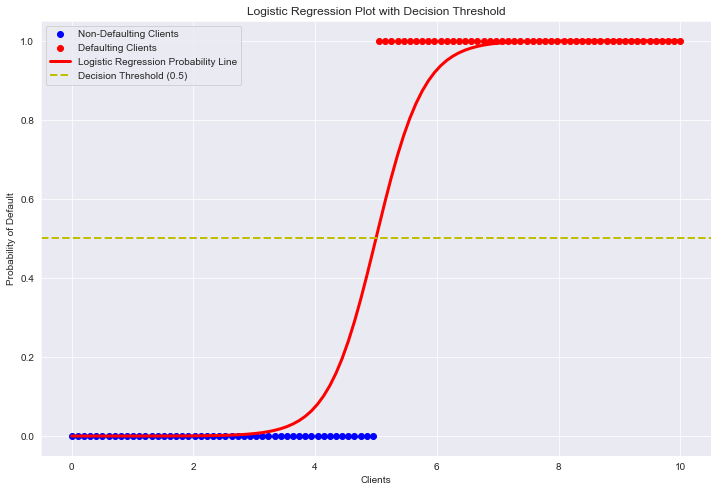

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Simulate some data (example)
X = np.linspace(0, 10, 100).reshape(-1, 1) # Generate 100 data points
y = (X > 5).astype(int).ravel() # Binary target variable (0 or 1)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)  # Fit the model on the data
y_pred_proba = model.predict_proba(X)[:, 1]  # Predict probabilities


# Create a larger figure to visualize the plot
plt.figure(figsize=(12, 8))

# Plotting the data points with different colors for each class
plt.scatter(X[y == 0], y[y == 0], color='blue', label='Non-Defaulting Clients')  # Non-defaulters in blue
plt.scatter(X[y == 1], y[y == 1], color='red', label='Defaulting Clients')  # Defaulters in red

# Plotting the logistic regression probability line
plt.plot(X, y_pred_proba, c='r', lw=3, label='Logistic Regression Probability Line')

# Add a horizontal line for the decision threshold
decision_threshold = 0.5
plt.axhline(y=decision_threshold, color='y', linestyle='--', lw=2, label='Decision Threshold (0.5)')

# Add labels and legend
plt.xlabel('Clients')  # Label for X axis
plt.ylabel('Probability of Default')  # Label for Y axis
plt.legend()
plt.title('Logistic Regression Plot with Decision Threshold')
plt.show()





### Baseline Logistic Regression Model with Cross-Validation and cost metric 10 * False Negatives + False Positives on training data

Mean Cost Score: -66253.33333333333
Test Cost: 49490


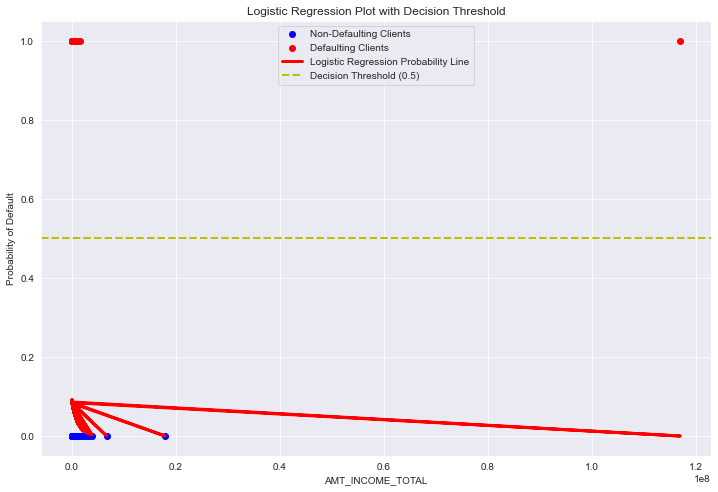

In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay

# Check if using Google Colab
using_colab = 'google.colab' in sys.modules

if using_colab:
    # Load the CSV file using the relative path
    project_root = '/content/drive/MyDrive/YourProjectFolder'  # Adjust the path as necessary
else:
    # Get the current working directory as base directory for the notebook
    base_dir = os.getcwd()
    # Adjust the project root path relatively to where the notebook is located
    project_root = os.path.join(base_dir, '..')

# Load the CSV file using relative path
train_domain_path = os.path.join(project_root, 'data', 'app_train_domain.csv')
train_data = pd.read_csv(train_domain_path)  # Load the training data

# Use 'AMT_INCOME_TOTAL' as the feature and 'TARGET' as the target variable
X = train_data['AMT_INCOME_TOTAL'].values.reshape(-1, 1) # Feature: AMT_INCOME_TOTAL (reshape to 2D array) for training
y = train_data['TARGET'].values # Target variable for training

# Create a custom cost metric function
def cost_metric(y_true, y_pred):
    false_negatives = ((y_true == 1) & (y_pred == 0)).sum()  # Count the false negatives, y_true = 1 and y_pred = 0, sum() counts the number of True values
    false_positives = ((y_true == 0) & (y_pred == 1)).sum()  # Count the false positives, y_true = 0 and y_pred = 1, sum() counts the number of True values 
    return 10 * false_negatives + false_positives  # Return the cost metric

# Create a scorer using the custom cost metric
cost_scorer = make_scorer(cost_metric, greater_is_better=False) # Create a scorer for the cost metric

# Create a pipeline with standard scaler and logistic regression
pipeline = Pipeline([ # Define the pipeline
    ('scaler', StandardScaler()), # Step 1: Standard Scaler
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000)) # Step 2: Logistic Regression, max_iter=1000 means maximum number of iterations taken for the solvers to converge
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets for X (features) and y (target variable)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring=cost_scorer) # Perform cross-validation with 3 folds and custom cost metric

# Calculate the mean cost score
mean_cost_score = np.mean(cv_scores) 
print(f'Mean Cost Score: {mean_cost_score}')

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train) # Fit the pipeline on the training data means scaling the data and fitting the logistic regression model to the training data

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1] # Predict probabilities for the test set using the pipeline [:, 1] selects the probabilities for the positive class
y_pred = (y_pred_proba >= 0.5).astype(int) # Convert probabilities to binary predictions using a threshold of 0.5

# Apply the custom cost metric on the test set
test_cost = cost_metric(y_test, y_pred) # Calculate the cost metric on the test set
print(f'Test Cost: {test_cost}') # Print the test cost

# Create a larger figure to visualize the plot
plt.figure(figsize=(12, 8))

# Plotting the data points with different colors for each class
plt.scatter(X_test[y_test == 0], y_test[y_test == 0], color='blue', label='Non-Defaulting Clients')  # Non-defaulters in blue
plt.scatter(X_test[y_test == 1], y_test[y_test == 1], color='red', label='Defaulting Clients')  # Defaulters in red

# Plotting the logistic regression probability line
plt.plot(X_test, y_pred_proba, c='r', lw=3, label='Logistic Regression Probability Line')

# Add a horizontal line for the decision threshold
decision_threshold = 0.5
plt.axhline(y=decision_threshold, color='y', linestyle='--', lw=2, label='Decision Threshold (0.5)')

# Add labels and legend
plt.xlabel('AMT_INCOME_TOTAL')  # Label for X axis
plt.ylabel('Probability of Default')  # Label for Y axis
plt.legend()
plt.title('Logistic Regression Plot with Decision Threshold')
plt.show()


#### Interpretation :
The logistic regression model, using `AMT_INCOME_TOTAL` as a feature, showed a mean cost score of -66253.33 on cross-validation and a test cost of 49490, indicating significant classification errors. The visualization highlighted a concentration of low-income clients and class imbalance. The model's performance suggests a need to explore additional or alternative features and address class imbalance for improved prediction accuracy.

### Visualize the ROC Curve and Precision-Recall Curve

ROC AUC: 0.5218759336175698


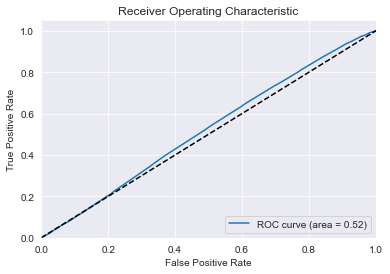

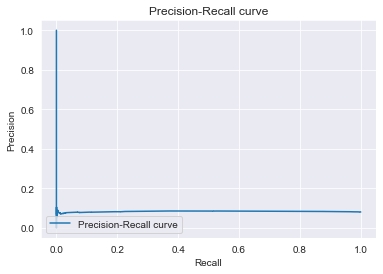

In [8]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()


### Interpretation of the ROC Curve and Precision-Recall Curve
- **ROC Curve**:
  - The ROC curve shows the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity).
  - The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between positive and negative classes.
  - A higher AUC value (closer to 1) indicates better model performance.
  - The logistic regression model used `AMT_INCOME_TOTAL` to predict which clients might default on their loans. However, the model's performance was poor, with a ROC AUC score of 0.52, which is barely better than random guessing (a score of 0.5 would indicate no predictive ability). This means the model can't reliably distinguish between clients who will default and those who won't. The precision-recall curve also showed low precision, indicating that many of the clients predicted to default were actually non-defaulters. These results suggest that the model needs better data or different features to improve its accuracy in predicting loan defaults.
  - Imbalanced classes affect the ROC curve, as it focuses on true positive and false positive rates, which can be misleading when the classes are imbalanced.
  - Techniques like resampling, adjusting class weights, or using more informative features can help address class imbalance which is not the case here.


### Visualizing Confusion Matrix for Logistic Regression Model

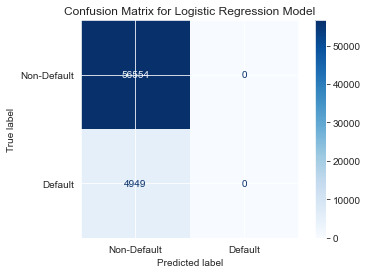

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Default', 'Default'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### Interpretation of the Confusion Matrix

The confusion matrix for the logistic regression model reveals significant class imbalance issues. The model predicts 64554 non-defaults correctly but fails to identify any defaults, with 4949 actual defaults all misclassified as non-defaults. This indicates the model's inability to correctly classify the minority class (defaults), leading to a high number of false negatives. Such a performance highlights the need for better handling of class imbalance, possibly through techniques like resampling or using more informative features. The overall model performance is poor, failing to capture critical default cases.


### Visualisation thresholds for Precision-Recall

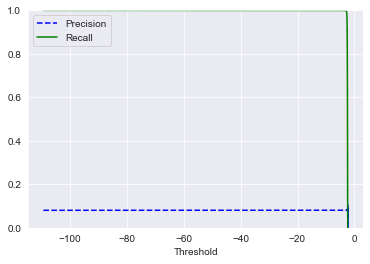

In [10]:
# Plot Precision-Recall vs Threshold
y_scores = pipeline.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()


### Conclusion

The logistic regression model used `AMT_INCOME_TOTAL` to predict loan defaults but faced challenges due to class imbalance, where non-defaulters significantly outnumbered defaulters. Despite using a custom cost metric that heavily penalizes false negatives, the model achieved a poor ROC AUC score of 0.52, indicating it barely performs better than random guessing. The precision-recall vs. threshold plot further demonstrated low precision across all thresholds, highlighting the model's struggle to correctly identify defaulters. This poor performance suggests that the model cannot effectively distinguish between defaulters and non-defaulters. To address these issues, potential solutions include using resampling techniques like SMOTE to balance the dataset, adjusting class weights in logistic regression, or incorporating more informative features. Implementing these strategies could help improve the model's predictive performance by better handling the class imbalance and enhancing the quality of features used for prediction.

The baseline model, which uses Logistic Regression, has been evaluated using various metrics, including ROC AUC, precision, recall, and the confusion matrix.  The next steps involve explore new models, hyperparameter tuning to improve the model's performance further.

# 3.Hyperparameter Tuning via GridSearchCV and Imbalanced-learn Pipeline with make_scorer for Custom Cost Metric

The objective of this code is to:
1. **Set Up Resampling Techniques**: Define over-sampling (SMOTE) and under-sampling (RandomUnderSampler) methods to handle class imbalance in the dataset.
2. **Initialize Models**: Create instances of RandomForestClassifier and RidgeClassifier for classification tasks.
3. **Define Hyperparameter Grids**: Specify parameter grids for tuning hyperparameters of the classifiers using GridSearchCV.
4. **Create Pipelines**: Construct pipelines to integrate resampling techniques with the classifiers.
5. **Perform Hyperparameter Tuning**: Use GridSearchCV to find the best hyperparameters and resampling techniques for each classifier, evaluating them using cross-validation and storing the best models.

### Set up Credit scoring Model with Hyperparameter Tuning and Custom Cost Metric and Resampling Techniques

In [2]:
import numpy as np
import pandas as pd
import os
import sys
import gc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import make_scorer, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Optimized custom cost metric function
def cost_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return 10 * false_negatives + false_positives

# Create a scorer using the custom cost metric
cost_scorer = make_scorer(cost_metric, greater_is_better=False)

# Determine if using Google Colab
using_colab = 'google.colab' in sys.modules

if using_colab:
    # Set project root for Google Colab
    project_root = '/content/drive/MyDrive/YourProjectFolder'  # Adjust the path as necessary
else:
    # Get the current working directory as base directory for the notebook
    base_dir = os.getcwd()
    # Adjust the project root path relatively to where the notebook is located
    project_root = os.path.join(base_dir, '..')

# Load the CSV file using relative path
train_domain_path = os.path.join(project_root, 'data', 'app_train_domain.csv')
app_train_domain = pd.read_csv(train_domain_path)

# Extract the features and target
X = app_train_domain.drop(columns=['TARGET']).values
y = app_train_domain['TARGET'].values

# Split the data into training and test sets for independent evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the resampling techniques
over_sampler = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Define the models
rf = RandomForestClassifier(random_state=42)
ridge = RidgeClassifier()

# Define the parameter grids for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [10, 20, 30, 40],
}

param_grid_ridge = {
    'classifier__alpha': [1.0, 0.1, 0.01, 0.001]
}

# Define pipelines with Robust Scaling
pipeline_rf_over = Pipeline([
    ('scaler', RobustScaler()),
    ('oversample', over_sampler),
    ('classifier', rf)
])

pipeline_rf_under = Pipeline([
    ('scaler', RobustScaler()),
    ('undersample', under_sampler),
    ('classifier', rf)
])

pipeline_rf_weight = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

pipeline_ridge_over = Pipeline([
    ('scaler', RobustScaler()),
    ('oversample', over_sampler),
    ('classifier', ridge)
])

pipeline_ridge_under = Pipeline([
    ('scaler', RobustScaler()),
    ('undersample', under_sampler),
    ('classifier', ridge)
])

pipeline_ridge_weight = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RidgeClassifier(class_weight='balanced'))
])

# Initialize the dictionaries to store the best estimators and ROC AUC scores
best_estimators = {}

# Perform GridSearchCV for each pipeline and store the best estimators
grids = [
    (pipeline_rf_over, param_grid_rf, 'Random Forest with Over-sampling'),
    (pipeline_rf_under, param_grid_rf, 'Random Forest with Under-sampling'),
    (pipeline_rf_weight, param_grid_rf, 'Random Forest with Class Weight'),
    (pipeline_ridge_over, param_grid_ridge, 'Ridge with Over-sampling'),
    (pipeline_ridge_under, param_grid_ridge, 'Ridge with Under-sampling'),
    (pipeline_ridge_weight, param_grid_ridge, 'Ridge with Class Weight')
]

cv_results = pd.DataFrame(columns=['Classifier', 'ROC AUC', 'F1', 'Accuracy', 'Precision', 'Recall', 'Confusion Matrix', 'Cost'])

for pipeline, param_grid, name in grids:
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=cost_scorer, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    # Predict probabilities for cross-validation
    if hasattr(grid_search.best_estimator_['classifier'], 'predict_proba'):
        y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3, method='predict_proba')[:, 1]
    elif hasattr(grid_search.best_estimator_['classifier'], 'decision_function'):
        y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3, method='decision_function')
    else:
        y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3, method='predict')

    # Evaluate the model on the training set
    roc_auc = roc_auc_score(y_train, y_pred)
    y_pred_binary = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_train, y_pred_binary)
    accuracy = accuracy_score(y_train, y_pred_binary)
    precision = precision_score(y_train, y_pred_binary)
    recall = recall_score(y_train, y_pred_binary)
    conf_matrix = confusion_matrix(y_train, y_pred_binary)
    cost = cost_metric(y_train, y_pred_binary)

    # Store the results in a DataFrame
    row = pd.DataFrame({
        'Classifier': [name],
        'ROC AUC': [roc_auc],
        'F1': [f1],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'Cost': [cost],
        'Confusion Matrix': [conf_matrix.tolist()]
    })
    cv_results = pd.concat([cv_results, row], ignore_index=True)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {name}: {roc_auc}")

# Select the best model based on ROC AUC scores
best_model_name = cv_results.loc[cv_results['ROC AUC'].idxmax(), 'Classifier']
best_model_final = best_estimators[best_model_name]
print(f"\nBest model: {best_model_name} with ROC AUC: {cv_results.loc[cv_results['ROC AUC'].idxmax(), 'ROC AUC']}")

gc.collect()

# Evaluate the best model on the test set
if hasattr(best_model_final['classifier'], 'predict_proba'):
    y_test_proba = best_model_final.predict_proba(X_test)[:, 1]
elif hasattr(best_model_final['classifier'], 'decision_function'):
    y_test_proba = best_model_final.decision_function(X_test)
else:
    y_test_proba = best_model_final.predict(X_test)

y_test_pred = (y_test_proba > 0.5).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
cost_test = cost_metric(y_test, y_test_pred)

# Store the test results in the DataFrame
test_results = pd.DataFrame(columns=['Classifier', 'ROC AUC', 'F1', 'Accuracy', 'Precision', 'Recall', 'Confusion Matrix', 'Cost'])
test_row = pd.DataFrame({
    'Classifier': [best_model_name + ' (Test)'],
    'ROC AUC': [roc_auc_test],
    'F1': [f1_test],
    'Accuracy': [accuracy_test],
    'Precision': [precision_test],
    'Recall': [recall_test],
    'Cost': [cost_test],
    'Confusion Matrix': [conf_matrix_test.tolist()]
})
test_results = pd.concat([test_results, test_row], ignore_index=True)

print("Confusion Matrix (Test):")
print(conf_matrix_test)
print(f"ROC AUC (Test): {roc_auc_test}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print(f"Test Cost: {cost_test}")

# Optimize the prediction threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
fscore = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(fscore)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# Apply the optimal threshold for predictions
y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)
conf_matrix_optimal = confusion_matrix(y_test, y_test_pred_optimal)

print("Confusion Matrix (Test) with Optimal Threshold:")
print(conf_matrix_optimal)
print("Classification Report (Test) with Optimal Threshold:")
print(classification_report(y_test, y_test_pred_optimal))
test_cost_optimal = cost_metric(y_test, y_test_pred_optimal)
print(f"Test Cost with Optimal Threshold: {test_cost_optimal}")

# Store the test results with optimal threshold in the DataFrame
optimal_test_row = pd.DataFrame({
    'Classifier': [best_model_name + ' (Test with Optimal Threshold)'],
    'ROC AUC': [roc_auc_test],
    'F1': [f1_test],
    'Accuracy': [accuracy_test],
    'Precision': [precision_test],
    'Recall': [recall_test],
    'Cost': [test_cost_optimal],
    'Confusion Matrix': [conf_matrix_optimal.tolist()]
})
test_results = pd.concat([test_results, optimal_test_row], ignore_index=True)

# Combine both results for display
final_results = pd.concat([cv_results, test_results], ignore_index=True)

# Display the summary table
summary_table = final_results[['Classifier', 'F1', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'Cost', 'Confusion Matrix']].copy()
summary_table.set_index('Classifier', inplace=True)
display(summary_table)


Best parameters for Random Forest with Over-sampling: {'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best ROC AUC for Random Forest with Over-sampling: 0.6798922320563212
Best parameters for Random Forest with Under-sampling: {'classifier__max_depth': 40, 'classifier__n_estimators': 400}
Best ROC AUC for Random Forest with Under-sampling: 0.7414209466566343
Best parameters for Random Forest with Class Weight: {'classifier__max_depth': 10, 'classifier__n_estimators': 400}
Best ROC AUC for Random Forest with Class Weight: 0.7292200496936276
Best parameters for Ridge with Over-sampling: {'classifier__alpha': 0.1}
Best ROC AUC for Ridge with Over-sampling: 0.741253635870008
Best parameters for Ridge with Under-sampling: {'classifier__alpha': 0.1}
Best ROC AUC for Ridge with Under-sampling: 0.7447050943468774
Best parameters for Ridge with Class Weight: {'classifier__alpha': 1.0}
Best ROC AUC for Ridge with Class Weight: 0.7467815949841202

Best model: Ridge with Class Weigh

,F1,Accuracy,Precision,Recall,ROC AUC,Cost,Confusion Matrix
Classifier,,,,,,,
Random Forest with Over-sampling,0.192647,0.871996,0.196414,0.189022,0.679892,176561,"[[210761, 15371], [16119, 3757]]"
Random Forest with Under-sampling,0.260524,0.694014,0.161867,0.667136,0.741421,134819,"[[157473, 68659], [6616, 13260]]"
Random Forest with Class Weight,0.263352,0.736777,0.170148,0.582361,0.729220,139464,"[[169678, 56454], [8301, 11575]]"
Ridge with Over-sampling,0.258582,0.888764,0.280162,0.240089,0.741254,163301,"[[213871, 12261], [15104, 4772]]"
Ridge with Under-sampling,0.246168,0.894243,0.290223,0.213725,0.744705,166669,"[[215743, 10389], [15628, 4248]]"
Ridge with Class Weight,0.247249,0.895451,0.295550,0.212518,0.746782,166588,"[[216064, 10068], [15652, 4224]]"
Ridge with Class Weight (Test),0.250968,0.896151,0.299050,0.216205,0.749324,41298,"[[54046, 2508], [3879, 1070]]"
Ridge with Class Weight (Test with Optimal Threshold),0.250968,0.896151,0.299050,0.216205,0.749324,34874,"[[48310, 8244], [2663, 2286]]"


Let's analyze and compare both models based on the given metrics and the confusion matrix:

### Metrics Comparison:
**Random Forest with Class Weight:**
- F1 Score: 0.263352
- Accuracy: 0.736777
- Precision: 0.170148
- Recall: 0.582361
- ROC AUC: 0.729220
- Cost: 139464
- Confusion Matrix: [[169678, 56454], [8301, 11575]]

**Ridge with Class Weight:**
- F1 Score: 0.247249
- Accuracy: 0.895451
- Precision: 0.295550
- Recall: 0.212518
- ROC AUC: 0.746782
- Cost: 166588
- Confusion Matrix: [[216064, 10068], [15652, 4224]]

### Confusion Matrix Details:
| Model                          | TN     | FP     | FN    | TP    |
|--------------------------------|--------|--------|-------|-------|
| Random Forest with Class Weight| 169678 | 56454  | 8301  | 11575 |
| Ridge with Class Weight        | 216064 | 10068  | 15652 | 4224  |

### Analysis:
1. **ROC AUC:**
   - **Ridge with Class Weight** has a higher ROC AUC (0.746782) compared to **Random Forest with Class Weight** (0.729220), indicating better overall performance in distinguishing between classes.

2. **Precision:**
   - **Ridge with Class Weight** has a significantly higher precision (0.295550) compared to **Random Forest with Class Weight** (0.170148). This means **Ridge** is better at minimizing false positives (FP).

3. **Recall:**
   - **Random Forest with Class Weight** has a higher recall (0.582361) compared to **Ridge with Class Weight** (0.212518). This indicates **Random Forest** is better at identifying true positives (TP).

4. **Cost:**
   - **Random Forest with Class Weight** has a lower cost (139464) compared to **Ridge with Class Weight** (166588), which means it has fewer significant errors (FN and FP).

5. **Confusion Matrix:**
   - **Random Forest** has fewer false negatives (8301) compared to **Ridge** (15652), indicating better detection of defaults.
   - **Ridge** has fewer false positives (10068) compared to **Random Forest** (56454), indicating better precision.

### Conclusion:
**Random Forest with Class Weight** is better at detecting defaults (higher recall and lower false negatives), resulting in a lower cost metric. However, **Ridge with Class Weight** provides a higher precision and better overall performance (higher ROC AUC), making it a more balanced model.

Given that the cost metric (10*FN + FP) is crucial for minimizing financial risk, **Random Forest with Class Weight** can be considered the best model. However, if the goal is to have a balanced model with fewer false positives, **Ridge with Class Weight** is a better option.

### Summary:
Both models have their strengths:
- **Random Forest with Class Weight:** Better at detecting defaults (lower cost, higher recall).
- **Ridge with Class Weight:** More balanced performance (higher ROC AUC, higher precision).

**Recommendation:** Depending on the business priority (minimizing financial risk or having a balanced model), either model can be selected. Further analysis and fine-tuning can help improve the models' performance and achieve the desired outcomes.

### 4. SHAP Analysis for Feature Importance

#### 4.1 Global Feature Importance Using SHAP

**Objective:**
1. **Initialize SHAP Explainer**: Create a SHAP explainer with training data.
2. **Compute SHAP Values**: Generate SHAP values for the validation data.
3. **Visualize**: Use a SHAP summary plot to show feature importance.

#### 4.2 Local Feature Importance Using SHAP

**Objective:**
1. **Setup SHAP Visualization**: Enable SHAP's interactive plots.
2. **Generate Local Explanation**: Create a SHAP force plot for a validation instance.
3. **Visualize Prediction**: Breakdown the impact of each feature on this prediction.

### Summary

- **Global Feature Importance**: SHAP summary plot highlights key features like `AMT_GOODS_PRICE`, `AMT_CREDIT`, and `CODE_GENDER_M`.
- **Local Feature Importance**: SHAP force plot shows how individual features affect a single prediction.

This analysis makes the model more interpretable by showing both overall and individual feature impacts.

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


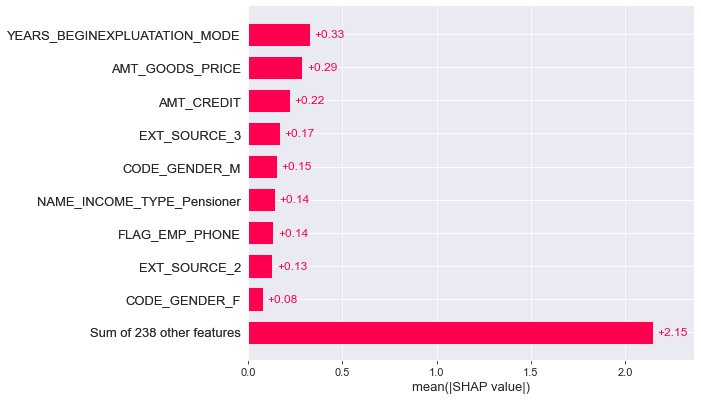

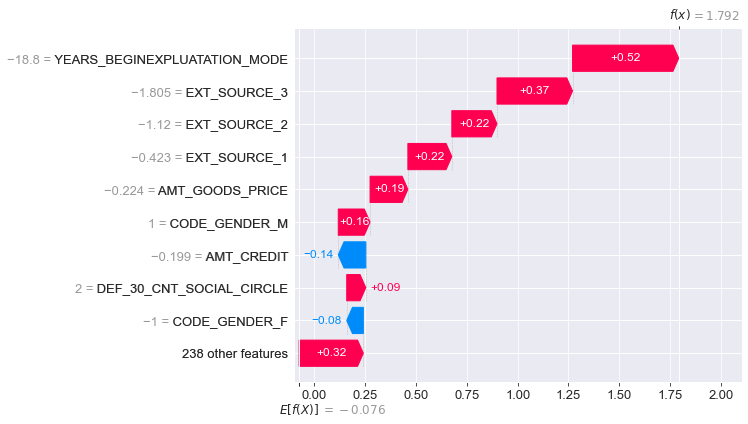

In [3]:
import shap
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier

# Ensure X is a DataFrame with column names
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=app_train_domain.drop(columns=['TARGET']).columns)

# Extract the classifier from the best pipeline
classifier = best_model_final.named_steps['classifier']

# Check if the classifier is RidgeClassifier
if not isinstance(classifier, RidgeClassifier):
    raise ValueError("The classifier is not a RidgeClassifier. Please check the best_model_final pipeline.")

# Create a new pipeline for preprocessing (excluding the classifier)
preprocessor = Pipeline(steps=best_model_final.steps[:-1])  # All steps except the last classifier

# Fit the preprocessor with the names of the features
preprocessor.fit(X)

# Transform the data with the preprocessor
X_preprocessed = preprocessor.transform(X)

# Convert the preprocessed data back to DataFrame to retain feature names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=X.columns)

# SHAP analysis
explainer = shap.Explainer(classifier, X_preprocessed_df)
shap_values = explainer(X_preprocessed_df)

# 4.1 Global Feature Importance Using SHAP
shap.plots.bar(shap_values)

# 4.2 Local Feature Importance Using SHAP
# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])



### Conclusion

- Global Analysis: Financial features such as goods price, credit amount, and external sources are crucial across the entire dataset, highlighting their importance in the model's predictions.
  Local Analysis: For individual predictions, demographic and personal features can play a more significant role, and understanding these contributions can provide valuable insights for decision-making processes.
  Next Steps: Continue to refine the model and explore further improvements by considering the feature importance insights provided by SHAP analysis. This approach helps ensure that the model is both interpretable and effective in making accurate predictions.

### Global conclusions :
- Process in the first notebook is as follows and the objective is to choose the best techniques for preprocessing with cost metric :
  - **Data Loading and Initial Analysis**: Load the data, perform initial analysis, and identify areas for improvement.
  - **Outlier Detection and Normality Test**: Detect outliers and test the normality of features to guide preprocessing steps.
  - **Cost Metric Definition**: Define a custom cost metric to minimize the combined cost of false negatives and false positives.
  - **Choose the best** techniques for preprocessing with cost metric

- Process in the second notebook is as follows:
  - **Data Loading and Initial Analysis**: Load the data, perform initial analysis, and identify areas for improvement.
  - **Baseline Model Creation**: Establish a baseline model using Logistic Regression to set a performance benchmark.
  - **Hyperparameter Tuning**: Use GridSearchCV to tune hyperparameters and select the best model with resampling techniques.
  - **SHAP Analysis**: Analyze feature importance using SHAP to understand the model's predictions. 
  
- Improvement could be done with more analysis cycles but the current process is a good start for the project (MVP). The next steps could be : minimize imbalance issue and improve the model's performance.

## Glossary

### Cross-Validation
A technique used to assess the performance of a model by splitting the dataset into multiple training and testing sets. This helps in understanding how the model will generalize to an independent dataset.

### GridSearchCV
A tool from `scikit-learn` that performs hyperparameter tuning by exhaustively searching through a specified parameter grid to find the best combination of hyperparameters for a given model, using cross-validation.

### Hyperparameter Tuning
The process of finding the optimal values for hyperparameters of a model, which are parameters that are not learned from data but set before the learning process begins. Examples include the number of trees in a random forest or the regularization strength in Ridge regression.

### ROC AUC Score
A performance measurement for classification problems at various threshold settings. ROC AUC represents the area under the Receiver Operating Characteristic curve, which plots the true positive rate against the false positive rate. A score closer to 1 indicates better performance.

### Confusion Matrix
A table used to describe the performance of a classification model by showing the actual vs. predicted classifications. It includes True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

### Classification Report
A detailed report showing the precision, recall, F1-score, and support for each class in a classification problem. This helps in understanding the performance of the model across different classes.

### Resampling Techniques
Methods used to adjust the class distribution of a dataset, commonly used to handle class imbalance. Examples include:
- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples for the minority class.
- **RandomUnderSampler**: Reduces the number of samples in the majority class.

### Pipeline
A tool from `scikit-learn` that allows for chaining multiple processing steps (e.g., data transformation and model fitting) into a single object. This ensures that all steps are applied consistently during both training and testing.

### SHAP (SHapley Additive exPlanations)
A method to explain individual predictions of machine learning models by assigning each feature an importance value. It helps in understanding how the model arrives at its predictions.

### SHAP Explainer
An object in the SHAP library that is used to calculate SHAP values for a given model. It helps in interpreting the contributions of each feature to the predictions.

### SHAP Values
Values calculated by the SHAP explainer that quantify the contribution of each feature to the model's prediction for a given instance. Higher absolute values indicate greater impact on the prediction.

### SHAP Summary Plot
A plot that visualizes the global importance of features by showing the distribution of SHAP values for each feature across all instances in the dataset. It helps in understanding which features are most influential for the model.

### SHAP Force Plot
A plot that provides a detailed breakdown of the contributions of each feature to a single instance's prediction, illustrating how different features push the prediction towards or away from the base value.

### Random Forest
An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### Ridge Classifier
A linear model for classification that includes L2 regularization (Ridge regression) to prevent overfitting by penalizing large coefficients.

### Class Weight
A parameter used to handle class imbalance by assigning different weights to different classes, typically to give more importance to the minority class. This can be set to 'balanced' to automatically adjust weights inversely proportional to class frequencies.

### RandomUnderSampler
A resampling technique that reduces the number of instances in the majority class by randomly sampling without replacement, used to balance the class distribution.

### SMOTE
A resampling technique that generates synthetic samples for the minority class by interpolating between existing minority class instances. It is used to balance the class distribution in the dataset.
